In [21]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
training = 'ALS_TrainingData_2223.csv'
training_df = pd.read_csv(training)

This contains two datasets one containing the training of the ALS case study and the other containing the testing for the ALS study. The goal of this assignment is to find the best k value with training and then use it on the testing dataset using the 3 features from the datasets. 

I chose sodium_median, trunk_min and calcium_median as the selected variables that I wanted to use the KMeans algorithm. I looked at the attributes the of subsetted training dataset. Sodium_median and calcium are continous variables, and trunk_min is a discrete variable. Furthermore there are 2,223 observations in this subset with no missing values. 

In [3]:
training_df = training_df[['Sodium_median', 'trunk_min','Calcium_median']]

print("top 5 rows for selected variables:", '\n', training_df.head(), '\n')
print("information about selected rows:", '\n', training_df.info(),'\n')
print("dimensions about selected variables:", '\n', training_df.shape, '\n')
print("Missing values of selected variables:", '\n', training_df.isnull().sum())
print(training_df['trunk_min'].value_counts())

top 5 rows for selected variables: 
    Sodium_median  trunk_min  Calcium_median
0          145.5          7        2.220550
1          138.0          5        2.170650
2          143.0          0        2.295400
3          139.0          3        2.345300
4          140.0          1        2.257975 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sodium_median   2223 non-null   float64
 1   trunk_min       2223 non-null   int64  
 2   Calcium_median  2223 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 52.2 KB
information about selected rows: 
 None 

dimensions about selected variables: 
 (2223, 3) 

Missing values of selected variables: 
 Sodium_median     0
trunk_min         0
Calcium_median    0
dtype: int64
trunk_min
0    488
2    285
3    276
1    271
6    256
5    251
4    242
7     89
8     65
Name: count, dtype

I chose sodium_median, trunk_min and calcium_median as the selected variables that I wanted to use the KMeans algorithm. I looked at the attributes the of subsetted training dataset. Sodium_median and calcium are continous variables, and trunk_min is a discrete variable. Furthermore there are 2,223 observations in this subset with no missing values. 

In [4]:
print("summary statisitcs:", '\n', training_df.describe())

summary statisitcs: 
        Sodium_median    trunk_min  Calcium_median
count    2223.000000  2223.000000     2223.000000
mean      140.145254     2.955915        2.345584
std         1.789886     2.358095        0.088418
min       128.000000     0.000000        2.045900
25%       139.000000     1.000000        2.282925
50%       140.000000     3.000000        2.345300
75%       141.000000     5.000000        2.400000
max       146.500000     8.000000        2.800000


I outputted the summary statistics to look at the variation between each column in the subset. We will have to standardize these columns because they are in different units. 

array([[<Axes: title={'center': 'Sodium_median'}>,
        <Axes: title={'center': 'trunk_min'}>],
       [<Axes: title={'center': 'Calcium_median'}>, <Axes: >]],
      dtype=object)

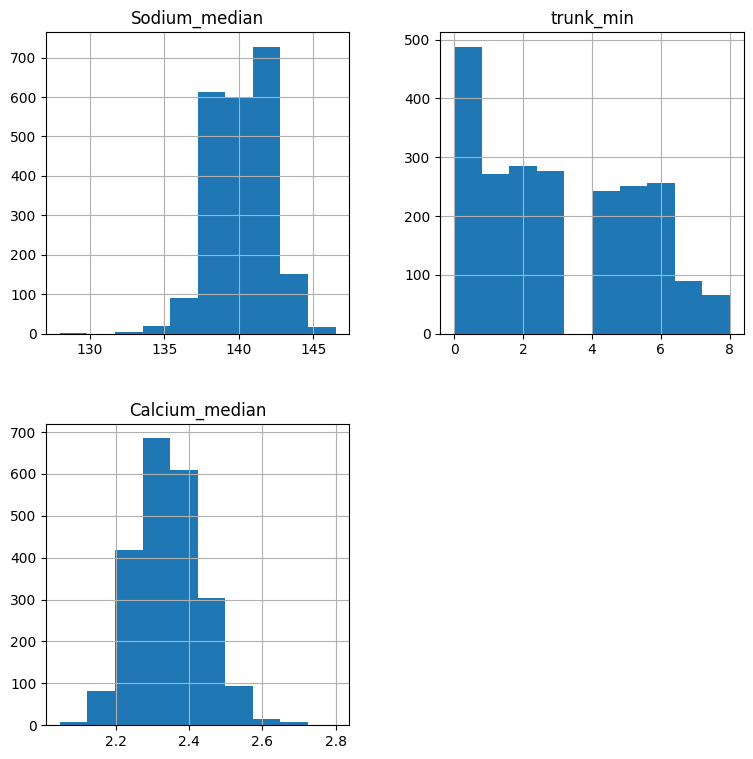

In [5]:
training_df.hist(figsize= (9,9))

3 histograms were displayed to represent the each columns. All of the histograms show skewness,

In [10]:
b = [-1,3,9]  
label = ['lower',  'high']  

# Create bins
training_df['trunk_bin'] = pd.cut(training_df['trunk_min'], bins=b, labels=label)
print(training_df.head(10))


   Sodium_median  trunk_min  Calcium_median trunk_bin
0          145.5          7        2.220550      high
1          138.0          5        2.170650      high
2          143.0          0        2.295400     lower
3          139.0          3        2.345300     lower
4          140.0          1        2.257975     lower
5          141.0          7        2.270450      high
6          141.5          2        2.245500     lower
7          144.0          2        2.295400     lower
8          142.0          2        2.330000     lower
9          137.0          1        2.300000     lower


I decided to create a column based on the binned values of trunk min. I seperated trunk min into 2 bins one for low trunk min (0 to 3) and high min (4 to 8). This column is called trunk bin.

<Axes: xlabel='Sodium_median', ylabel='Calcium_median'>

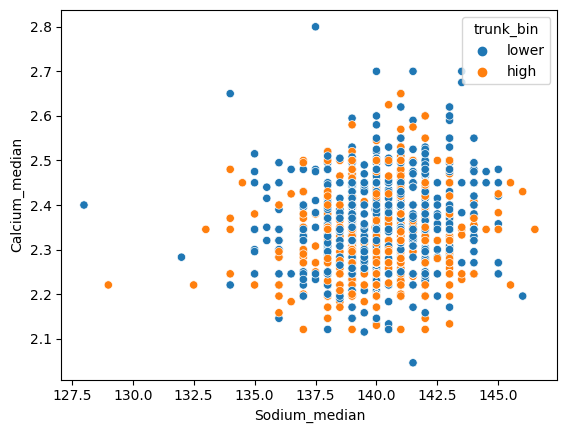

In [7]:
sns.scatterplot(training_df, x = 'Sodium_median', y = 'Calcium_median', hue = 'trunk_bin')

I created to a scatterplot to see if there was any natural clustering for calcium_median and sodium_median based on the trunk bin column that I created

In [11]:
training_df = training_df.drop(['trunk_bin'], axis = 1)


In [14]:

scale = StandardScaler()

scale_df = scale.fit_transform(training_df)

training_df = pd.DataFrame(scale_df, columns=training_df.columns)

print(training_df.head())

   Sodium_median  trunk_min  Calcium_median
0       2.992342   1.715365       -1.414439
1      -1.198812   0.867032       -1.978932
2       1.595291  -1.253800       -0.567701
3      -0.639992   0.018699       -0.003208
4      -0.081171  -0.829634       -0.991070


Before starting the K-means clustering algorithm, I standardized the subset to eliminate the possibility of model being biased to Sodium_mean because it had a higher range of values.

In [16]:
n_clusters = [2, 4, 6]
c_inertia = []
sil_scores = []


In [23]:
for i in n_clusters:
    KM = KMeans(n_clusters= i).fit(training_df)
    c_inertia.append(KM.inertia_)
    sil_avg = silhouette_score(training_df, KM.labels_)
    sil_scores.append(sil_avg)

C:\Users\dgmur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dgmur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dgmur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


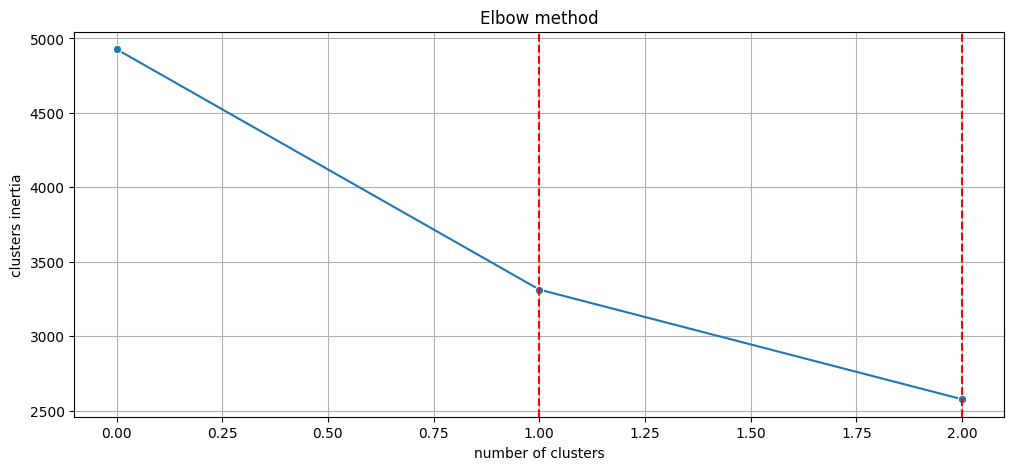

In [27]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(c_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(1, ls="--", c="red")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

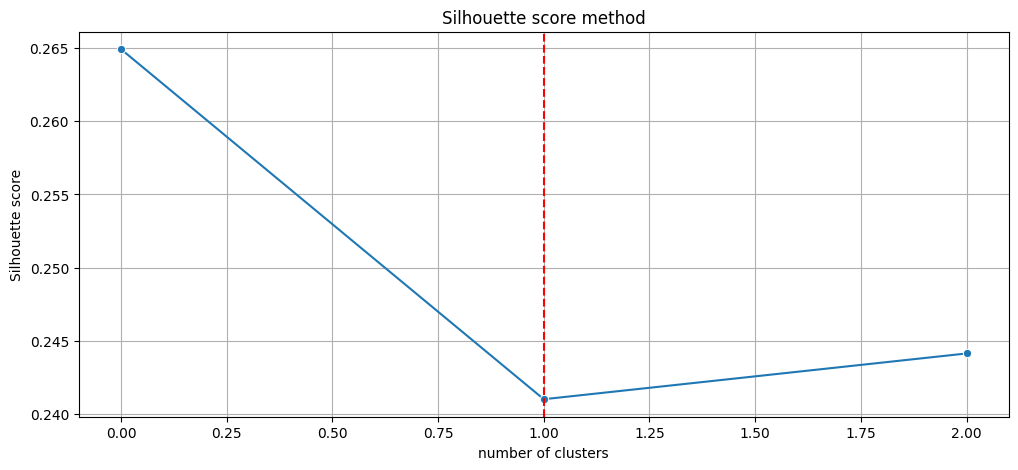

In [29]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(sil_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(1, ls="--", c="red")
plt.grid()
plt.show()

In [32]:
KM2 = KMeans(n_clusters=2).fit(training_df)
KM2_df = training_df.copy()
KM2_df.loc[:,'Cluster'] = KM2.labels_


C:\Users\dgmur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
KM2_size = KM2_df.groupby('Cluster').size().to_frame()
KM2_size.columns = ["KM_size"]
print(KM2_size)

         KM_size
Cluster         
0           1193
1           1030


The number of observations for each cluster are close to even.

In [51]:
c = pd.DataFrame(KM2.cluster_centers_, columns = training_df.columns)
print(c)

   Sodium_median  trunk_min  Calcium_median
0       0.057225  -0.772487        0.271617
1      -0.066521   0.897978       -0.315742


This indicates that the Kmeans algorithm where k=2 is struggling to form the clusters, the noise behind this data may have an influence on this algorithm.

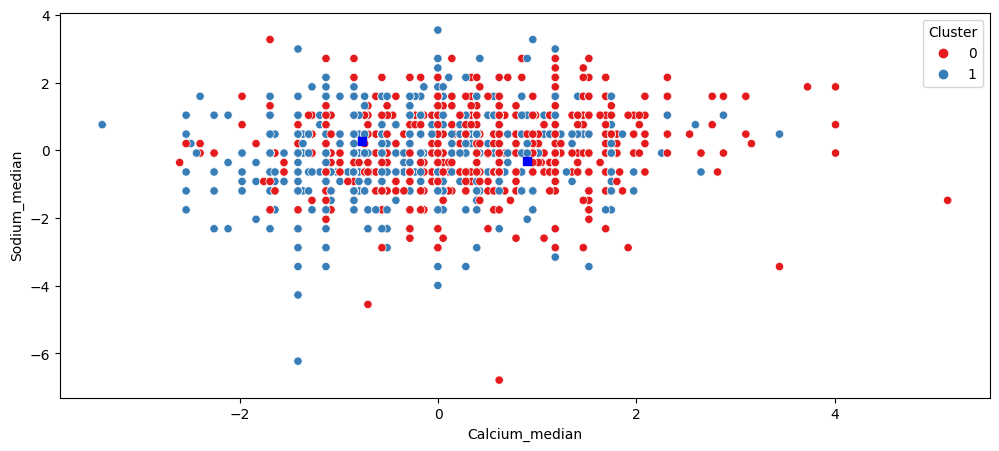

In [47]:
fig1, (axes) = plt.subplots(1,figsize=(12,5))



scat_1 = sns.scatterplot(data=KM2_df, x='Calcium_median', y='Sodium_median',
                 hue='Cluster', ax=axes, palette='Set1', legend='full')



axes.scatter(KM2.cluster_centers_[:,1],KM2.cluster_centers_[:,2], marker='s', s=40, c="blue")

plt.show()

Unfortunately, Kmeans did not create seperation or clusters using a K of 2. This is pretty similar to the scatterplot that was displayed earlier

I used the Kmeans algorithm, where k is 2 on the testing subset using the same variables to see, if there were any differences.

In [38]:
testing = 'ALS_TestingData_78.csv'

testing_df = pd.read_csv(testing)

In [39]:
testing_df = testing_df[['Sodium_median', 'trunk_min','Calcium_median']]

In [40]:
scale_df2 = scale.fit_transform(testing_df)

testing_df = pd.DataFrame(scale_df2, columns=testing_df.columns)

print(testing_df.head())

   Sodium_median  trunk_min  Calcium_median
0      -1.540062  -0.851721        0.353935
1       0.156617  -0.851721       -0.902286
2      -0.861391  -0.851721        0.114655
3      -0.182719   1.423424        0.114655
4       2.531967   2.333482        0.114655


In [41]:
KM2_2 = KMeans(n_clusters=2).fit(testing_df)
KM2_df2 = testing_df.copy()
KM2_df2.loc[:,'Cluster'] = KM2_2.labels_

C:\Users\dgmur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
KM2_size2 = KM2_df2.groupby('Cluster').size().to_frame()
KM2_size2.columns = ["KM_size"]
print(KM2_size2)

         KM_size
Cluster         
0             33
1             45


In [52]:
c2 = pd.DataFrame(KM2_2.cluster_centers_, columns = training_df.columns)
print(c2)

   Sodium_median  trunk_min  Calcium_median
0        0.38284   0.995973       -0.101966
1       -0.28075  -0.730380        0.074775


The centroids are facing the same issues as the training data kmeans algorithm.

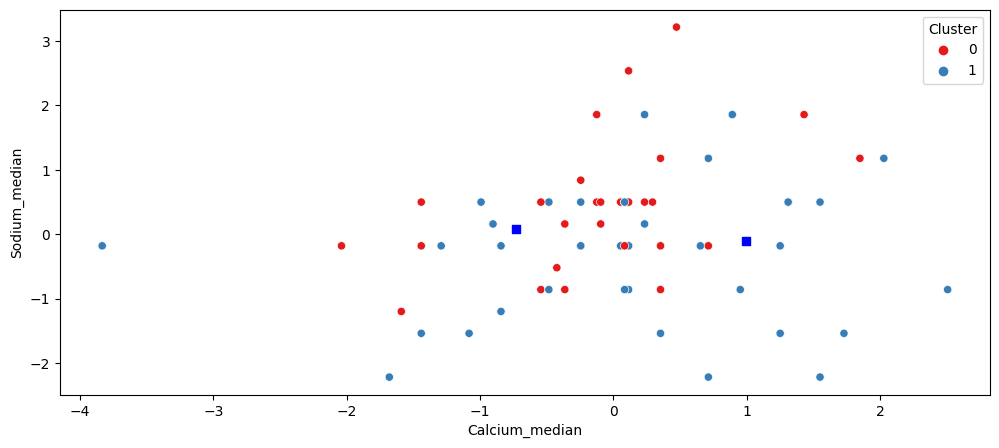

In [49]:
fig1, (axes) = plt.subplots(figsize=(12,5))



scat_1 = sns.scatterplot(data=KM2_df2, x='Calcium_median', y='Sodium_median',
                 hue='Cluster', ax=axes, palette='Set1', legend='full')



axes.scatter(KM2_2.cluster_centers_[:,1],KM2_2.cluster_centers_[:,2], marker='s', s=40, c="blue")

plt.show()

There was a bit more signs of cluster formation using the testing. Cluster one seems to contain high values of calcium_median with low values of sodium_median, while cluster 0 has higher values of sodium_median, calcium_median values hovering around -1.5 and 0.5. 